In [44]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#File to load
cab_data_path = "Resources/Kaggle_Data/cab_rides.csv"

#Read the Cab data
cab_df = pd.read_csv(cab_data_path)

#Display the cab_df file for preview
cab_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [45]:
#Clean Data

#Convert the 13-digit timestamp to a date-time format
import datetime
cab_df['Time Stamp'] = pd.to_datetime(cab_df['time_stamp']/1000, unit = 's')
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
cab_df['Day of Week'] = cab_df['Time Stamp'].dt.dayofweek
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

#Remove columns that are not applicable to analysis
cleaned_cab_df = cab_df[['distance', 'cab_type', 'destination', 'source', 'price', 'Day of Week']]

#Rename columns
cleaned_cab_df = cleaned_cab_df.rename(columns = {'distance': 'Distance',
                                                  'cab_type': 'Company',
                                                  'destination': 'Destination',
                                                  'source': 'Source',
                                                  'price': 'Price'})

#Remove rows that are missing values
cleaned_cab_df = cleaned_cab_df.dropna(how='any')

cleaned_cab_df

,Distance,Company,Destination,Source,Price,Day of Week
0,0.44,Lyft,North Station,Haymarket Square,5.0,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,3
...,...,...,...,...,...,...
693065,1.00,Uber,North End,West End,9.5,5
693066,1.00,Uber,North End,West End,13.0,5
693067,1.00,Uber,North End,West End,9.5,5
693069,1.00,Uber,North End,West End,27.0,5


In [46]:
#Print research question
print('How do ride distance and ride price compare across the various ride sources?')

How do ride distance and ride price compare across the various ride sources?


In [47]:
grouped_by_source = cleaned_cab_df.groupby('Source')
grouped_by_destination = cleaned_cab_df.groupby('Destination')

source_counts = grouped_by_source.count()['Distance']
destination_counts = grouped_by_destination.count()['Distance']
source_average_price = grouped_by_source['Price'].mean()
destination_average_price = grouped_by_destination['Price'].mean()
source_average_distance = grouped_by_source['Distance'].mean()
destination_average_distance = grouped_by_destination['Distance'].mean()

grouped_location_summary = pd.concat([source_counts, destination_counts, source_average_price, destination_average_price, source_average_distance,destination_average_distance ], axis = 1)
grouped_location_summary.columns = ['Count as Source', 'Count as Destination', 'Average Price as Source', 'Average Price as Destination', 'Average Distance as Source', 'Average Distance as Destination']
grouped_location_summary

,Count as Source,Count as Destination,Average Price as Source,Average Price as Destination,Average Distance as Source,Average Distance as Destination
Back Bay,53201,53190,16.047394,16.210152,1.981815,2.085002
Beacon Hill,52841,52840,15.664030,16.248335,2.035296,2.214378
Boston University,53172,53171,18.853034,18.942137,3.051155,3.023516
Fenway,53166,53166,18.379491,18.146419,2.811519,2.866372
Financial District,54197,54192,18.181372,18.046280,2.708317,2.584741
Haymarket Square,53147,53171,13.578114,14.255553,1.120289,1.331153
North End,53171,53164,15.153373,15.002210,1.610733,1.637896
North Station,52576,52577,16.364006,16.805238,2.218849,2.226485
Northeastern University,53164,53165,17.901124,17.827517,2.722848,2.640654
South Station,53160,53159,15.672479,14.828549,1.842061,1.612408


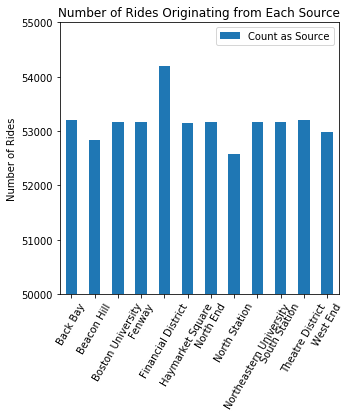

In [104]:
#Pull the relevent data into a dataframe
count_as_source_series = pd.DataFrame(grouped_location_summary['Count as Source'])

#Create a bar graph showing the number of rides originating from each source
count_as_source_series.plot(kind = 'bar', figsize = (5,5))

#Format the bar graph
plt.title("Number of Rides Originating from Each Source")
plt.ylabel("Number of Rides")
plt.xlim(-.5, len(count_as_source_series)-.5)
plt.ylim(50000, 55000)
#set_xticks('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
plt.xticks(rotation=60)
#plt.legend(prop={'size': 25})
    #https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
#plt.xticks(rotation=45, size=12)
    #https://stackoverflow.com/questions/17827748/matplotilb-bar-chart-diagonal-tick-labels
#plt.yticks(size=15)

#Save the figure
plt.savefig('Figures/count_as_source.png')

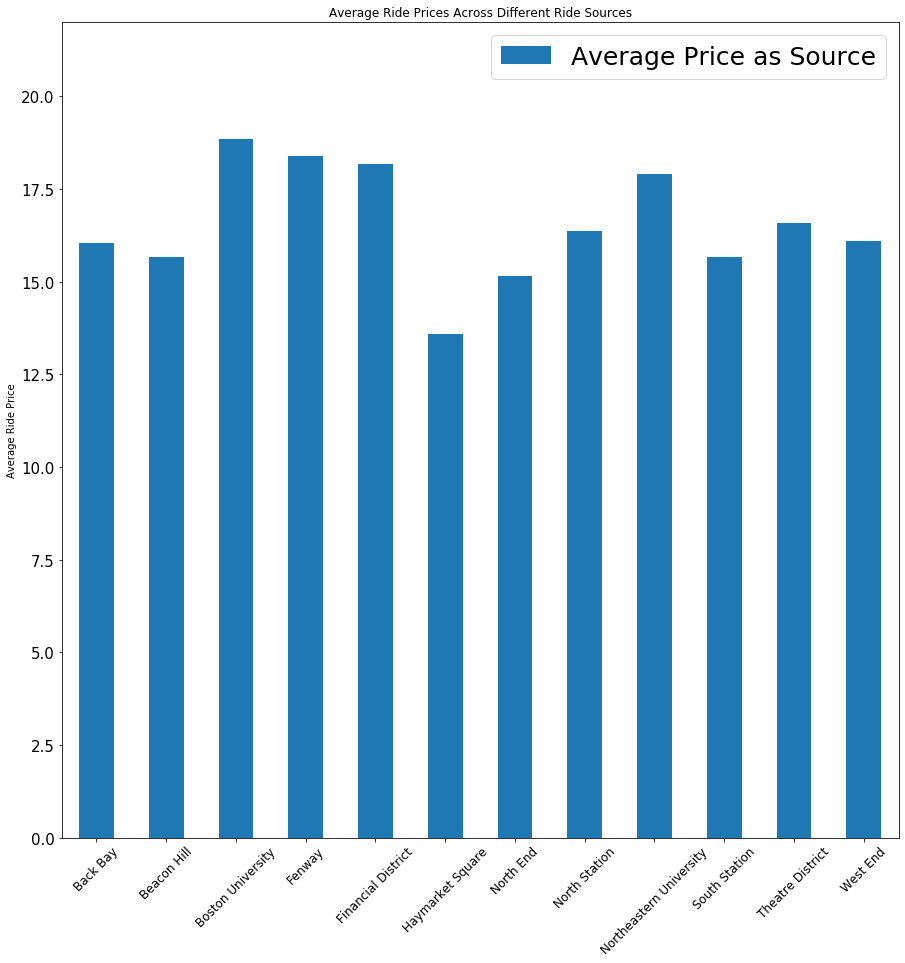

In [90]:
#Pull the relevent data into a dataframe
price_as_source_series = pd.DataFrame(grouped_location_summary['Average Price as Source'])

#Create a bar graph showing the average ride price of rides originating from each each source
price_as_source_series.plot(kind = 'bar', figsize = (15,15))

#Format the bar graph
plt.title("Average Ride Prices Across Different Ride Sources")
plt.ylabel('Average Ride Price')
plt.xlim(-.5, len(price_as_source_series)-.5)
plt.ylim(0, 22)
plt.legend(prop={'size': 25})
plt.xticks(rotation=45, size=12)
plt.yticks(size=15)

#Save the figure
plt.savefig('Figures/price_as_source.png')

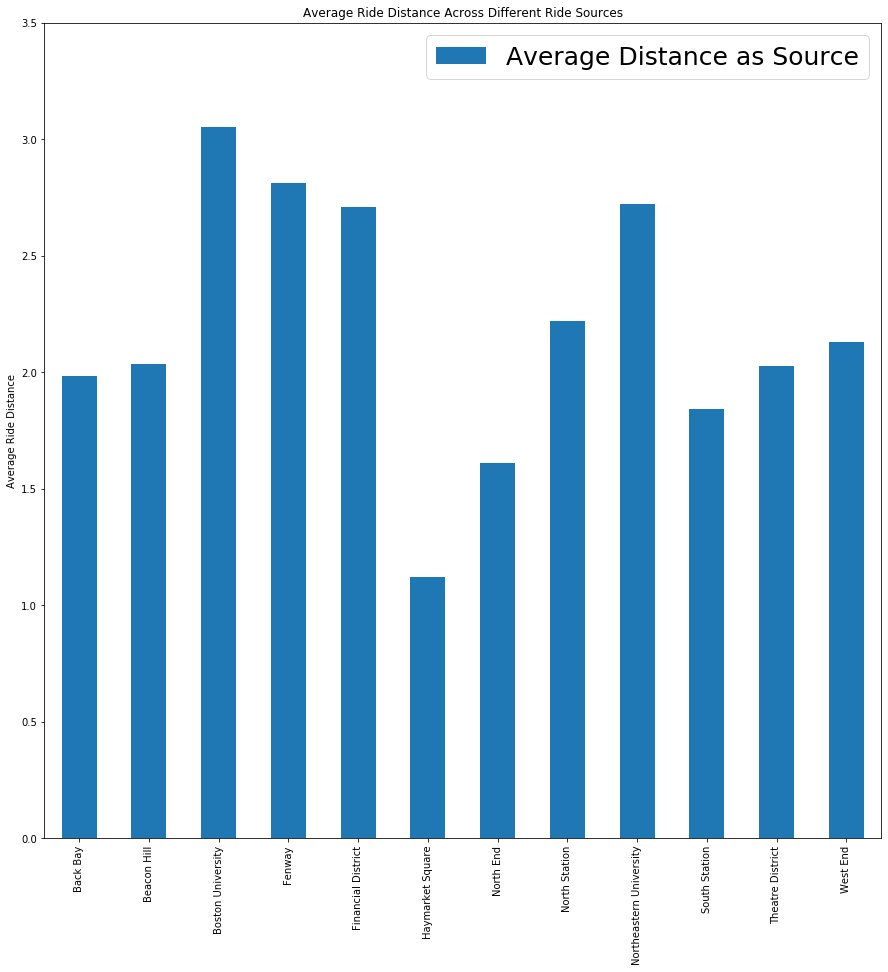

In [71]:
#Pull the relevent data into a dataframe
distance_as_source_series = pd.DataFrame(grouped_location_summary['Average Distance as Source'])

#Create a bar graph showing the average ride distance of rides originating from each each source
distance_as_source_series.plot(kind = 'bar', figsize = (15,15))

#Format the bar graph
plt.title('Average Ride Distance Across Different Ride Sources')
plt.ylabel('Average Ride Distance')
plt.xlim(-.5, len(distance_as_source_series)-.5)
plt.ylim(0, 3.5)
plt.legend(prop={'size': 25})

#Save the figure
plt.savefig('Figures/distance_as_source.png')

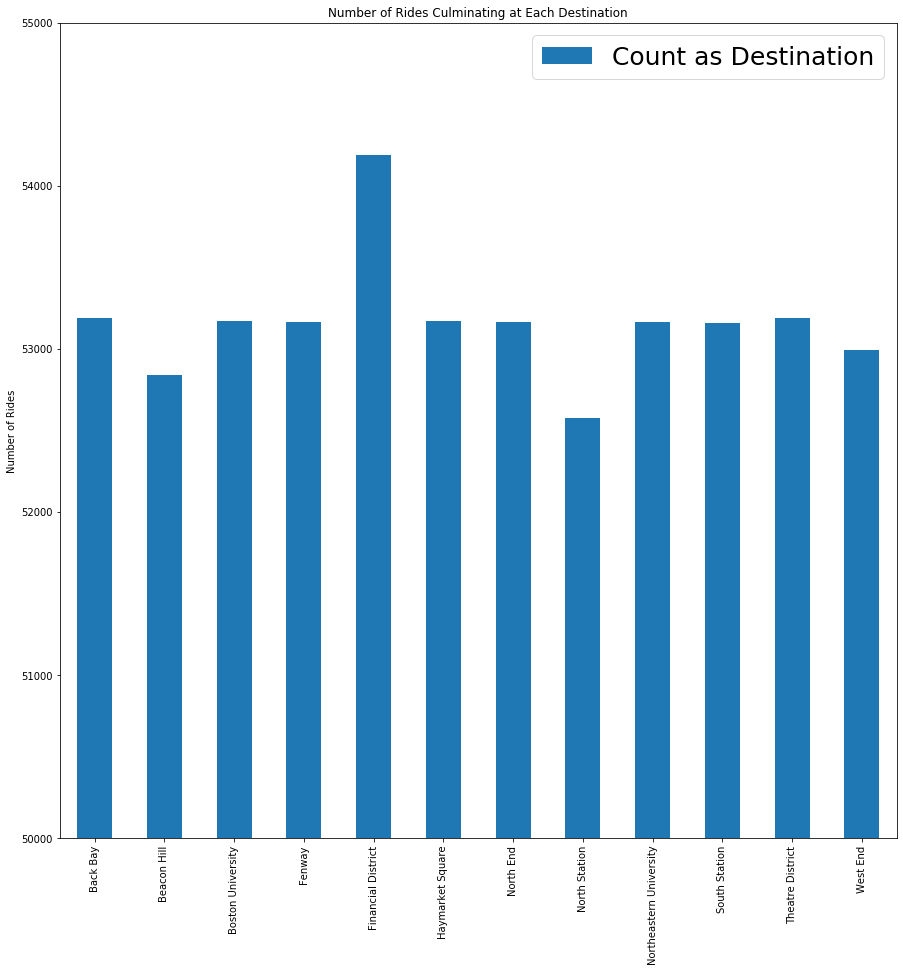

In [72]:
#Pull the relevent data into a dataframe
count_as_destination_series = pd.DataFrame(grouped_location_summary['Count as Destination'])

#Create a bar graph showing the number of rides culminating at each destination
count_as_destination_series.plot(kind = 'bar', figsize = (15,15))

#Format the bar graph
plt.title("Number of Rides Culminating at Each Destination")
plt.ylabel("Number of Rides")
plt.xlim(-.5, len(count_as_source_series)-.5)
plt.ylim(50000, 55000)
plt.legend(prop={'size': 25})

#Save the figure
plt.savefig('Figures/count_as_destination.png')

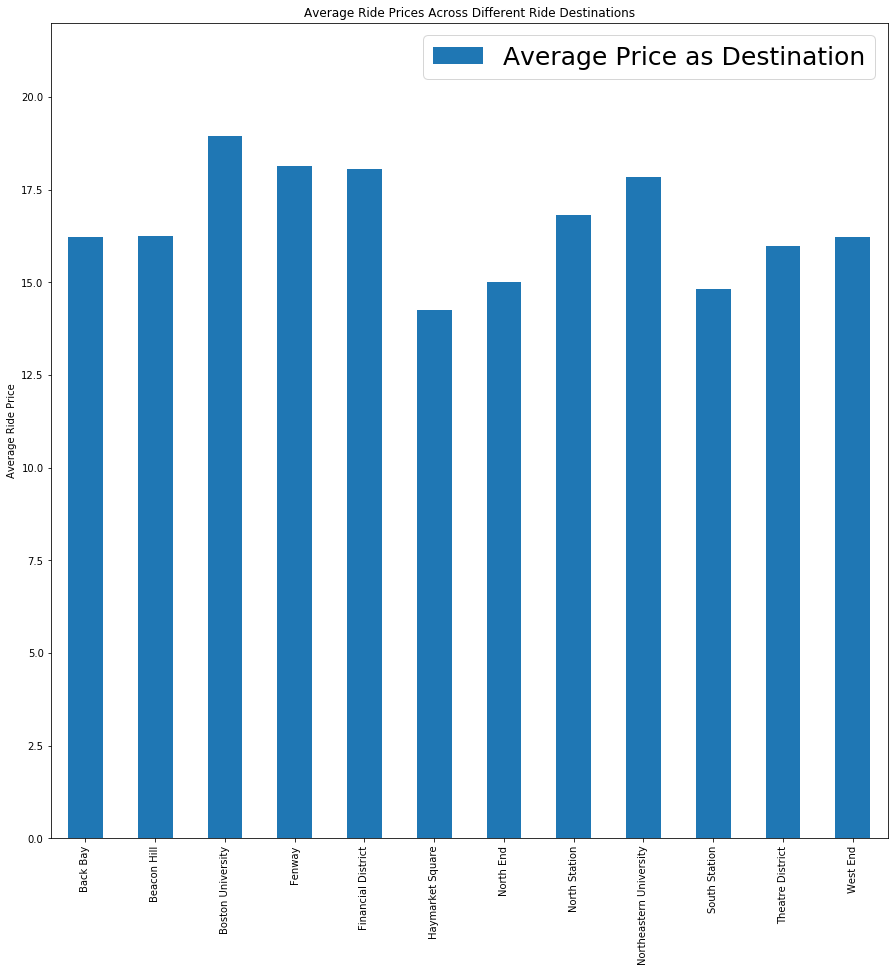

In [73]:
#Pull the relevent data into a dataframe
price_as_destination_series = pd.DataFrame(grouped_location_summary['Average Price as Destination'])

#Create a bar graph showing the average ride price of rides culminating at each destination
price_as_destination_series.plot(kind = 'bar', figsize = (15,15))


#Format the bar graph
plt.title('Average Ride Prices Across Different Ride Destinations')
plt.ylabel('Average Ride Price')
plt.xlim(-.5, len(price_as_destination_series)-.5)
plt.ylim(0, 22)
plt.legend(prop={'size': 25})

#Save the figure
plt.savefig('Figures/price_as_destination.png')

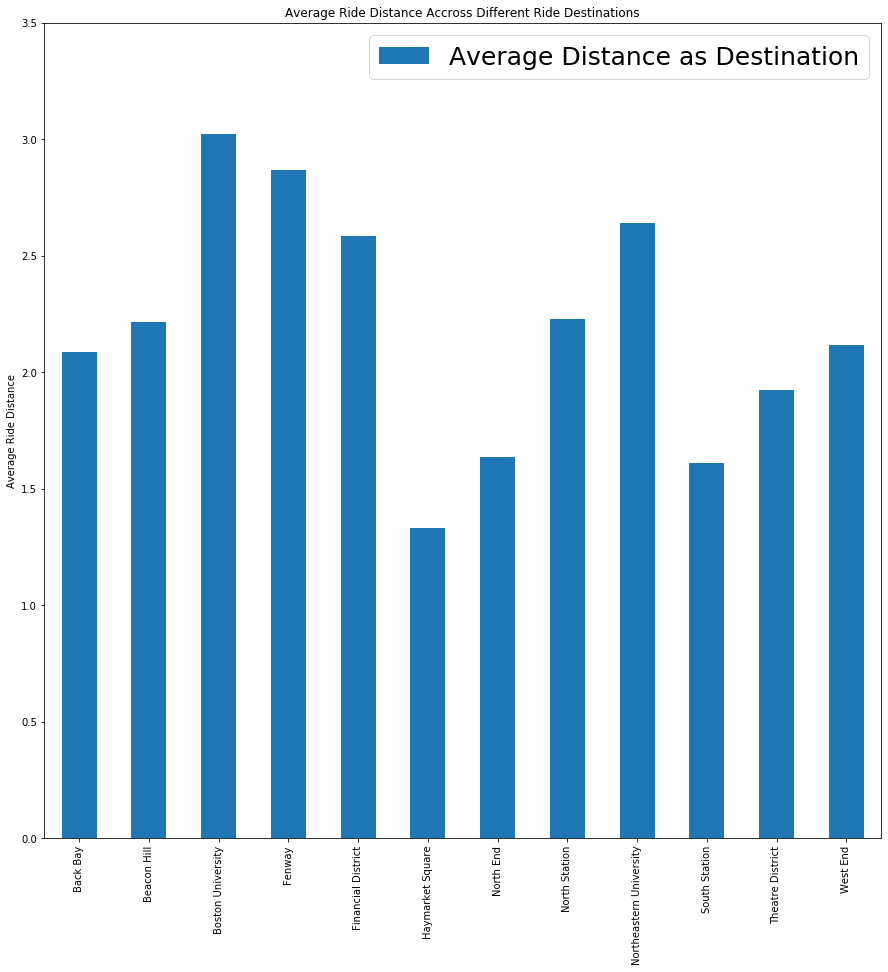

In [74]:
#Pull the relevent data into a dataframe
distance_as_destination_series = pd.DataFrame(grouped_location_summary['Average Distance as Destination'])

#Create a bar graph showing the average ride distance of rides culminating at each destination
distance_as_destination_series.plot(kind = 'bar', figsize = (15,15))

#Format the bar graph
plt.title('Average Ride Distance Accross Different Ride Destinations')
plt.ylabel('Average Ride Distance')
plt.xlim(-.5, len(distance_as_destination_series)-.5)
plt.ylim(0, 3.5)
plt.legend(prop={'size': 25})

#Save the figure
plt.savefig('Figures/distance_as_destination.png')